In [1]:
import gymnasium as gym
from gym.wrappers.monitoring.video_recorder import VideoRecorder
import numpy as np
import matplotlib.pyplot as plt

print(gym.__version__)

0.29.1


In [2]:
env = gym.make('CartPole-v1', render_mode='rgb_array')

print(env.observation_space)
print(env.action_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Discrete(2)


In [3]:
done = False
step_count = 0

env.reset()
while not done:
    step_count += 1
    observation, reward, done, _, _ = env.step(env.action_space.sample())

print(f"STEPS: {step_count}")

STEPS: 27


FINISHED EPISODE: 10, BEST AVG STEPS: 85.6
FINISHED EPISODE: 20, BEST AVG STEPS: 156.4
FINISHED EPISODE: 30, BEST AVG STEPS: 1760.3
FINISHED EPISODE: 40, BEST AVG STEPS: 1760.3
FINISHED EPISODE: 50, BEST AVG STEPS: 1760.3
FINISHED EPISODE: 60, BEST AVG STEPS: 1760.3
FINISHED EPISODE: 70, BEST AVG STEPS: 3053.9
FINISHED EPISODE: 80, BEST AVG STEPS: 3053.9
FINISHED EPISODE: 90, BEST AVG STEPS: 3053.9
AVERAGE STEP COUNT: 8006.5


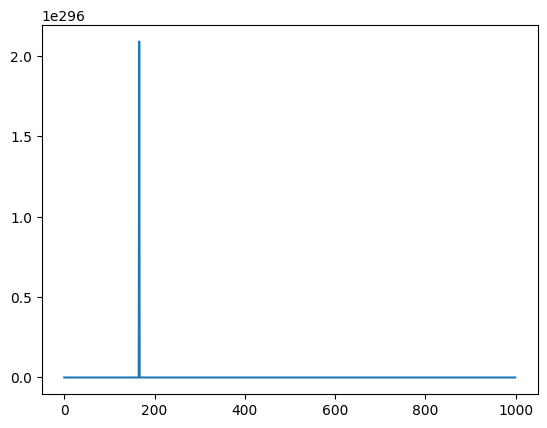

In [4]:
best_weights = np.zeros(4)
best_step_count = 0.0

episode_lengths = np.empty(1000)
i = 0
for episode in range(100):
    current_weights = -10.0 + 20.0 * np.random.rand(4)
    avg_step_count = 0.0
    for test_episode in range(10):
        observation, _ = env.reset()
        done = False
        step_count = 0
        while not done and (step_count < 10000):
            step_count += 1
            action = 1 if observation.dot(current_weights) > 0 else 0
            observation, reward, done, _, _ = env.step(action)
        avg_step_count += step_count

    avg_step_count /= 10
    episode_lengths[i] = avg_step_count
    i += 1
    
    if avg_step_count > best_step_count:
        best_weights = current_weights
        best_step_count = avg_step_count

    if (episode > 0) and (episode % 10 == 0):
        print(f"FINISHED EPISODE: {episode}, BEST AVG STEPS: {best_step_count}")

avg_step_count = 0.0
for test_episode in range(100):
    observation, _ = env.reset()
    done = False
    step_count = 0
    while not done and (step_count < 10000):
        step_count += 1
        action = 1 if observation.dot(best_weights) > 0 else 0
        observation, reward, done, _, _ = env.step(action)
    avg_step_count += step_count
avg_step_count /= 100

print(f"AVERAGE STEP COUNT: {avg_step_count}")

plt.plot(episode_lengths)
plt.show()

In [5]:
recording_filename = "final_result.mp4"
video = VideoRecorder(env, recording_filename)

observation, _ = env.reset()
done = False
step_count = 0
while not done and (step_count < 10000):
    step_count += 1
    env.render()
    video.capture_frame()
    action = 1 if observation.dot(best_weights) > 0 else 0
    observation, reward, done, _, _ = env.step(action)

video.close()
env.close()

Moviepy - Building video final_result.mp4.
Moviepy - Writing video final_result.mp4



Moviepy - Done !
Moviepy - video ready final_result.mp4
